## Cats Vs Dogs

In [1]:
## Imports

In [2]:
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle
from tqdm import tqdm

TRAIN_DIR = "C:/Users/akash/ceeri/catsvsdogs/train"
TEST_DIR = "C:/Users/akash/ceeri/catsvsdogs/test"

IMG_SIZE=50
LR= 1e-3
MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic') # just so we remember which saved model is which, sizes must match

In [3]:
#function to label images 
def label_img(img):
    word_label=img.split('.')[-3]
    #conversion to one-hot array
    if word_label=='cat':return [1,0]
    elif word_label=='dog':return [0,1]

In [4]:
#train data creation function
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [5]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [6]:
train_data = create_train_data()

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [02:12<00:00, 189.34it/s]


In [7]:
test_data=process_test_data()

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [00:46<00:00, 286.92it/s]


In [8]:
import tflearn

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [12]:
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

In [13]:
convnet = input_data(shape=[None,IMG_SIZE,IMG_SIZE,1],name='input')
convnet=conv_2d(convnet,32,5,activation='relu')
convnet=max_pool_2d(convnet,5)

convnet=conv_2d(convnet,64,5,activation='relu')
convnet=max_pool_2d(convnet,5)

convnet=fully_connected(convnet,1024,activation='relu')
convnet=dropout(convnet,0.8)

convnet=fully_connected(convnet,2,activation='softmax')
convnet=regression(convnet,optimizer='adam',learning_rate=LR,loss="categorical_crossentropy",name='targets')
model = tflearn.DNN(convnet, tensorboard_dir='log')

In [11]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

INFO:tensorflow:Restoring parameters from C:\Users\akash\ceeri\catsvsdogs\dogsvscats-0.001-2conv-basic.model


InvalidArgumentError: Restoring from checkpoint failed. This is most likely due to a mismatch between the current graph and the graph from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Assign requires shapes of both tensors to match. lhs shape= [256,1024] rhs shape= [32,1024]
	 [[{{node save_1/Assign_16}} = Assign[T=DT_FLOAT, _class=["loc:@FullyConnected/W"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](FullyConnected/W, save_1/RestoreV2/_37)]]
	 [[{{node save_1/RestoreV2/_48}} = _Send[T=DT_FLOAT, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_50_save_1/RestoreV2", _device="/job:localhost/replica:0/task:0/device:CPU:0"](save_1/RestoreV2:22)]]

Caused by op 'save_1/Assign_16', defined at:
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\asyncio\base_events.py", line 427, in run_forever
    self._run_once()
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\asyncio\base_events.py", line 1440, in _run_once
    handle._run()
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\ioloop.py", line 758, in _run_callback
    ret = callback()
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\gen.py", line 1233, in inner
    self.run()
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\kernelbase.py", line 370, in dispatch_queue
    yield self.process_one()
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\gen.py", line 346, in wrapper
    runner = Runner(result, future, yielded)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\gen.py", line 1080, in __init__
    self.run()
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-d62895399b21>", line 13, in <module>
    model = tflearn.DNN(convnet, tensorboard_dir='log')
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tflearn\models\dnn.py", line 65, in __init__
    best_val_accuracy=best_val_accuracy)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tflearn\helpers\trainer.py", line 147, in __init__
    allow_empty=True)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\training\saver.py", line 1094, in __init__
    self.build()
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\training\saver.py", line 1106, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\training\saver.py", line 1143, in _build
    build_save=build_save, build_restore=build_restore)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\training\saver.py", line 787, in _build_internal
    restore_sequentially, reshape)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\training\saver.py", line 428, in _AddRestoreOps
    assign_ops.append(saveable.restore(saveable_tensors, shapes))
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\training\saver.py", line 119, in restore
    self.op.get_shape().is_fully_defined())
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\ops\state_ops.py", line 221, in assign
    validate_shape=validate_shape)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\ops\gen_state_ops.py", line 65, in assign
    use_locking=use_locking, name=name)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\util\deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\ops.py", line 3272, in create_op
    op_def=op_def)
  File "C:\Users\akash\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\ops.py", line 1768, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Restoring from checkpoint failed. This is most likely due to a mismatch between the current graph and the graph from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Assign requires shapes of both tensors to match. lhs shape= [256,1024] rhs shape= [32,1024]
	 [[{{node save_1/Assign_16}} = Assign[T=DT_FLOAT, _class=["loc:@FullyConnected/W"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](FullyConnected/W, save_1/RestoreV2/_37)]]
	 [[{{node save_1/RestoreV2/_48}} = _Send[T=DT_FLOAT, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_50_save_1/RestoreV2", _device="/job:localhost/replica:0/task:0/device:CPU:0"](save_1/RestoreV2:22)]]


In [ ]:
train = train_data[:-500]
test = train_data[-500:]

In [ ]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

In [ ]:
model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

In [ ]:
import tensorflow as tf
tf.reset_default_graph()

In [ ]:
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')



if os.path.exists('C:/Users/H/Desktop/KaggleDogsvsCats/{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

train = train_data[:-500]
test = train_data[-500:]

X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

model.fit({'input': X}, {'targets': Y}, n_epoch=10, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

model.save(MODEL_NAME)

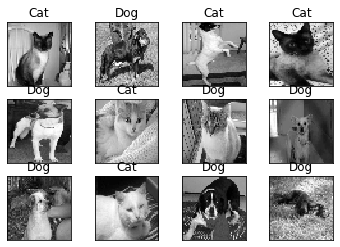

In [24]:
import matplotlib.pyplot as plt

# if you need to create the data:
#test_data = process_test_data()
# if you already have some saved:
test_data = np.load('test_data.npy')

fig=plt.figure()

for num,data in enumerate(test_data[:12]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [25]:
with open('submission_file.csv','w') as f:
    f.write('id,label\n')
            
with open('submission_file.csv','a') as f:
    for data in tqdm(test_data):
        img_num = data[1]
        img_data = data[0]
        orig = img_data
        data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
        model_out = model.predict([data])[0]
        f.write('{},{}\n'.format(img_num,model_out[1]))

100%|██████████| 12500/12500 [00:53<00:00, 234.48it/s]
